# Clustering Casas

In [1]:
# Importar DataFrame

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv', sep=',')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
## Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
## Filtrar DataFrame con las columnas requeridas

X = df[["Latitude","Longitude","MedInc"]]
X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


## División del conjunto de datos

In [4]:
## 
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(X, train_size= 0.8, random_state=42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [5]:
## Escalado
from sklearn.preprocessing import StandardScaler

## scaler

scaler = StandardScaler()


X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

## Validación de número de clusters optimos

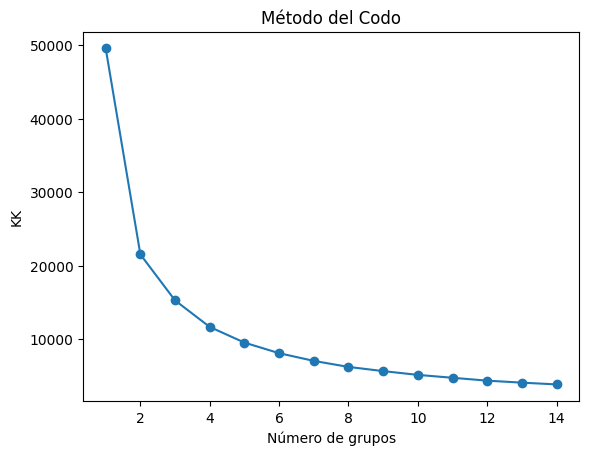

In [6]:
### Busqueda de El K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_scale)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

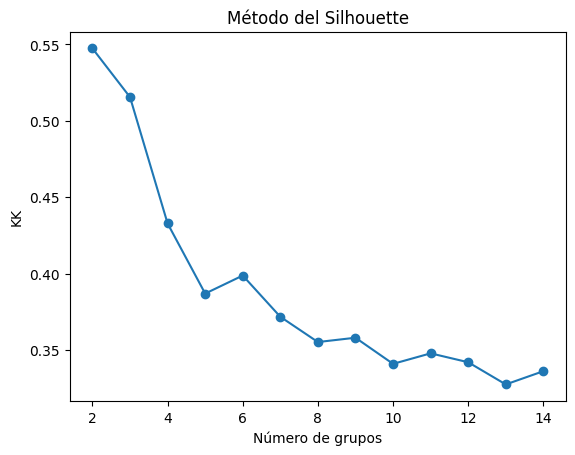

In [7]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_scale)

    predict = kmeans.predict(X_train_scale)
    silhouette_avg = metrics.silhouette_score(X_train_scale, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del Silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

## Desarrollo del modelo K-Means

In [17]:
## Modelo ideal
ideal_model = KMeans(n_clusters=2, n_init='auto', random_state=42)
ideal_model.fit(X_train_scale)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


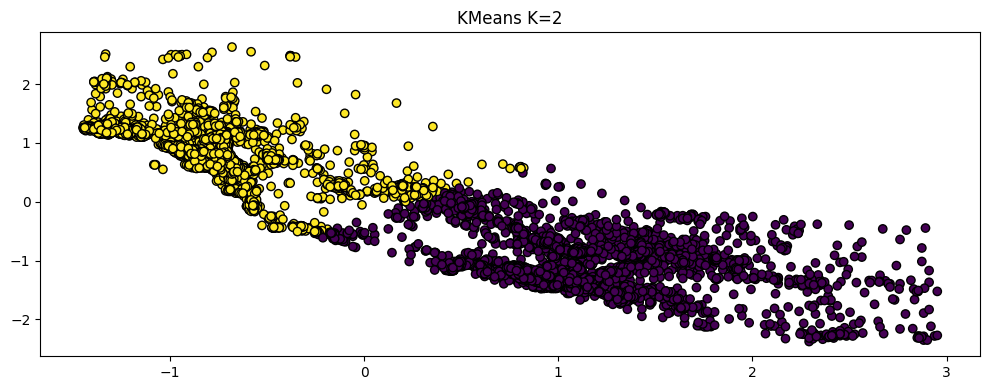

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.scatter(
        x = X_train_scale[:, 0],
        y = X_train_scale[:, 1], 
        c = list(ideal_model.labels_),
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax.set_title('KMeans K=2')
plt.tight_layout()
plt.show();

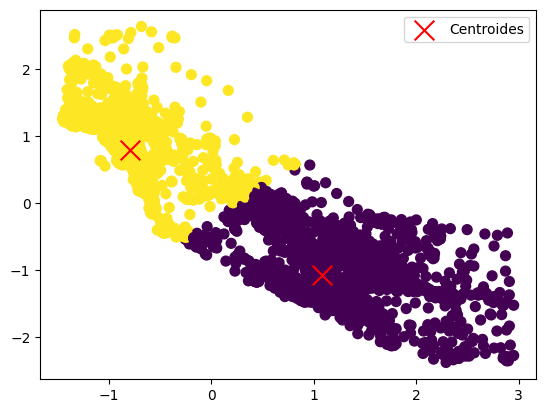

In [10]:
## Visualización de los clusters
plt.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c=ideal_model.labels_, s=50, cmap='viridis')
plt.scatter(ideal_model.cluster_centers_[:, 0], ideal_model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.legend()
plt.show()

In [9]:
## Centroides
ideal_model.cluster_centers_[:, 0]

array([ 1.0813604 , -0.79460335])

In [23]:
ideal_model.predict(X_train_scale)

array([1, 1, 1, ..., 1, 0, 0], shape=(16512,), dtype=int32)

In [11]:
## Determinar y_train
y_train = list(ideal_model.labels_)

## Agregar los clusters al conjunto de de datos de entrenamiento

X_train['cluster'] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,0


In [13]:
## Cantidad de registros por clusters

X_train['cluster'].value_counts()

cluster
1    9519
0    6993
Name: count, dtype: int64

In [14]:
## Cantidad de registros por clusters

X_train['cluster'].value_counts(normalize=True)

cluster
1    0.57649
0    0.42351
Name: proportion, dtype: float64

In [15]:
## Promedio de ingresos por clusters

X_train.groupby('cluster')['MedInc'].mean()

cluster
0    3.818376
1    3.926579
Name: MedInc, dtype: float64

In [16]:
X_train.groupby('cluster')['MedInc'].std()

cluster
0    1.868915
1    1.928684
Name: MedInc, dtype: float64

<Axes: xlabel='Latitude', ylabel='MedInc'>

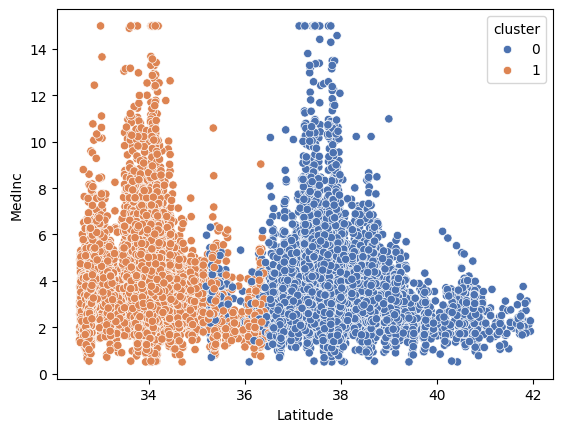

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

#fig, axis = plt.subplots( figsize = (15, 5))

sns.scatterplot(data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")

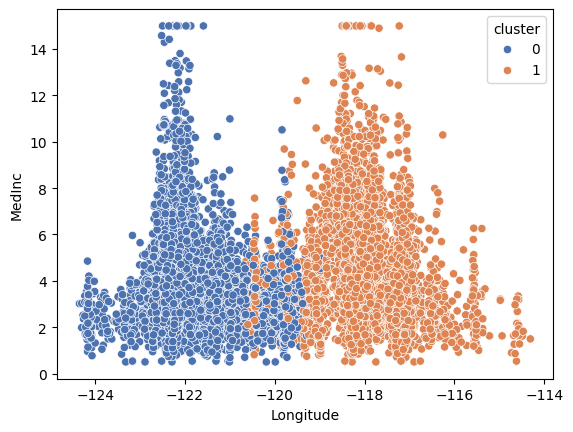

In [18]:
sns.scatterplot(data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.show()

## Predicción

In [19]:
## predict con el x_test

y_test = ideal_model.predict(X_test_scale)

X_test['cluster'] = y_test

In [20]:
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,1
3024,35.14,-119.46,2.5313,1
15663,37.80,-122.44,3.4801,0
20484,34.28,-118.72,5.7376,1
9814,36.62,-121.93,3.7250,0


In [21]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,0
